# Time-Series Data Analysis

## Contents

### 1. Importing libraries and data
### 2. Cleaning, wrangling, and subsetting time-series data
    #### Billboard Hot 100 Songs df: US charts, October 2008- November 2023
    #### Exploring Taylor stats, including vs. other artists
### 3. Time series analysis: smoothing data
### 4. Time series analysis: decomposition part 1
### Return to data subsetting based on decomposition part 1
### Decomposition part 2
### 5. Testing for stationarity
### 6. Stationarizing 

# 01. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import os
import warnings 

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
# create path

path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [3]:
# Import Billboard Hot 100 songs df *
# This is the cleaned version that contains all artists.
# Using so that I can put 0 as values and have a complete time series set
# of consecutive time intervals

df_bill = pd.read_csv(os.path.join(path, '02 Manipulated data', 'bill_top_songs_all_artists_clean.csv'), index_col = 0)

In [4]:
# Import google dataframe (newly aquired on 12/21/2023)
# Could be neat to use alongside prior top chart trends to note potential future trends

df_g = pd.read_csv(os.path.join(path, '01 Sourced Data', 'ts_goog_usa_2006_2023.csv'), index_col = 0)

# 02. Cleaning, wrangling, and subsetting data

## Billboard Hot 100 Charts

In [5]:
df_bill.shape

(340600, 9)

In [6]:
df_bill.head(20)

,chart_week,current_song_position,song_title,artist,last_week,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt
0,11/11/2023,1,Is It Over Now? (Taylor's Version) [From The V...,Taylor Swift,0.0,1,1,1.0,NaN
1,11/11/2023,2,Now That We Don't Talk (Taylor's Version) [Fro...,Taylor Swift,0.0,2,1,1.0,NaN
2,11/11/2023,3,Slut! (Taylor's Version) [From The Vault],Taylor Swift,0.0,3,1,1.0,NaN
3,11/11/2023,4,Paint The Town Red,Doja Cat,2.0,1,13,0.0,NaN
4,11/11/2023,5,Say Don't Go (Taylor's Version) [From The Vault],Taylor Swift,0.0,5,1,1.0,NaN
5,11/11/2023,6,Cruel Summer,Taylor Swift,1.0,1,26,1.0,NaN
6,11/11/2023,7,Bad Blood (Taylor's Version),Taylor Swift,0.0,7,1,1.0,NaN
7,11/11/2023,8,Snooze,SZA,3.0,2,47,0.0,NaN
8,11/11/2023,9,Style (Taylor's Version),Taylor Swift,0.0,9,1,1.0,NaN
9,11/11/2023,10,Suburban Legends (Taylor's Version) [From The ...,Taylor Swift,0.0,10,1,1.0,NaN


In [7]:
df_bill.tail(20)

,chart_week,current_song_position,song_title,artist,last_week,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt
340580,8/4/1958,81,Beautiful Delilah,Chuck Berry,NaN,81,1,NaN,NaN
340581,8/4/1958,82,Blip Blop,Bill Doggett,NaN,82,1,NaN,NaN
340582,8/4/1958,83,Try The Impossible,Lee Andrews And The Hearts,NaN,83,1,NaN,NaN
340583,8/4/1958,84,Summertime Blues,Eddie Cochran,NaN,84,1,NaN,NaN
340584,8/4/1958,85,Got A Match?,The Daddy-O's,NaN,85,1,NaN,NaN
340585,8/4/1958,86,To Be Loved,Jackie Wilson,NaN,86,1,NaN,NaN
340586,8/4/1958,87,Jealousy,Kitty Wells,NaN,87,1,NaN,NaN
340587,8/4/1958,88,Just Like In The Movies,The Upbeats,NaN,88,1,NaN,NaN
340588,8/4/1958,89,Blue Boy,Jim Reeves,NaN,89,1,NaN,NaN
340589,8/4/1958,90,Stay,The Ames Brothers,NaN,90,1,NaN,NaN


Note: from prior step, added 1.0 for Taylor tracks. Will edit further as a boolean value. For the purposes of this time series, I am including all Taylor songs, not just studio albums.

In [8]:
# Check columns, dtypes, and counts

df_bill.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340600 entries, 0 to 340599
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   chart_week             340600 non-null  object 
 1   current_song_position  340600 non-null  int64  
 2   song_title             340600 non-null  object 
 3   artist                 340600 non-null  object 
 4   last_week              308140 non-null  float64
 5   song_peak_pos          340600 non-null  int64  
 6   song_wks_on_chart      340600 non-null  int64  
 7   taylor                 3186 non-null    float64
 8   wk_top_s_cnt           0 non-null       float64
dtypes: float64(3), int64(3), object(3)
memory usage: 26.0+ MB


After other wrangling, will convert chart_week variable to index as date

In [9]:
df_bill['chart_week'].value_counts(dropna=False) # shows 100 entries for each week

chart_week
11/11/2023    100
7/5/1980      100
6/21/1980     100
6/14/1980     100
6/7/1980      100
             ... 
1/19/2002     100
1/12/2002     100
1/5/2002      100
12/29/2001    100
8/4/1958      100
Name: count, Length: 3406, dtype: int64

In [10]:
# Get all the unique values in the chart week columns

unique_weeks = df_bill['chart_week'].unique()

In [11]:
# Count the number of unique weeks 

number_chart_weeks = len(unique_weeks)

print("Unique Values", unique_weeks)
print("Number of Chart Weeks", number_chart_weeks)

Unique Values ['11/11/2023' '11/4/2023' '10/28/2023' ... '8/18/1958' '8/11/1958'
 '8/4/1958']
Number of Chart Weeks 3406


There are 3406 weeks of the dataframe, but that is because it starts in 1958. Will edit as subset.

In [12]:
df_bill.isnull().sum()

chart_week                    0
current_song_position         0
song_title                    0
artist                        0
last_week                 32460
song_peak_pos                 0
song_wks_on_chart             0
taylor                   337414
wk_top_s_cnt             340600
dtype: int64

In [13]:
# Remove last_week column - not needed for analysis

df_bill.drop(columns=['last_week'], axis=1, inplace=True)

In [14]:
df_bill.columns

Index(['chart_week', 'current_song_position', 'song_title', 'artist',
       'song_peak_pos', 'song_wks_on_chart', 'taylor', 'wk_top_s_cnt'],
      dtype='object')

Will address taylor and wk_top_s_cnt after subset

In [15]:
df_bill_dupes= df_bill[df_bill.duplicated()]

In [16]:
df_bill_dupes # no duplicates

,chart_week,current_song_position,song_title,artist,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt


## Subsetting October 24 2006 onwards

After create subset, will check for Nan, create boolean flag for Taylor songs, and recheck for dtypes

In [17]:
df_bill.head()

,chart_week,current_song_position,song_title,artist,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt
0,11/11/2023,1,Is It Over Now? (Taylor's Version) [From The V...,Taylor Swift,1,1,1.0,NaN
1,11/11/2023,2,Now That We Don't Talk (Taylor's Version) [Fro...,Taylor Swift,2,1,1.0,NaN
2,11/11/2023,3,Slut! (Taylor's Version) [From The Vault],Taylor Swift,3,1,1.0,NaN
3,11/11/2023,4,Paint The Town Red,Doja Cat,1,13,0.0,NaN
4,11/11/2023,5,Say Don't Go (Taylor's Version) [From The Vault],Taylor Swift,5,1,1.0,NaN


In [18]:
df_bill.tail()

,chart_week,current_song_position,song_title,artist,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt
340595,8/4/1958,96,Over And Over,Thurston Harris,96,1,NaN,NaN
340596,8/4/1958,97,I Believe In You,Robert & Johnny,97,1,NaN,NaN
340597,8/4/1958,98,Little Serenade,The Ames Brothers,98,1,NaN,NaN
340598,8/4/1958,99,I'll Get By (As Long As I Have You),Billy Williams,99,1,NaN,NaN
340599,8/4/1958,100,Judy,Frankie Vaughan,100,1,NaN,NaN


In [19]:
# Convert the chart_week column to datetime

df_bill['chart_week'] = pd.to_datetime(df_bill['chart_week'], format='%m/%d/%Y')

In [20]:
df_bill['chart_week'].dtype

dtype('<M8[ns]')

In [21]:
# Create dataframe with values 10/24/2008 onward

data_bill_sub = df_bill.loc[(df_bill['chart_week'] > '10/24/2008')]

In [22]:
data_bill_sub.tail(20)

,chart_week,current_song_position,song_title,artist,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt
78580,2008-10-25,81,Bust Your Windows,Jazmine Sullivan,81,1,NaN,NaN
78581,2008-10-25,82,Feel That Fire,Dierks Bentley,82,1,NaN,NaN
78582,2008-10-25,83,Here,Rascal Flatts,83,2,NaN,NaN
78583,2008-10-25,84,I'll Walk,Bucky Covington,84,2,NaN,NaN
78584,2008-10-25,85,In Color,Jamey Johnson,85,2,NaN,NaN
78585,2008-10-25,86,Lovebug,Jonas Brothers,78,5,NaN,NaN
78586,2008-10-25,87,Superwoman,Alicia Keys,82,5,NaN,NaN
78587,2008-10-25,88,The Day That Never Comes,Metallica,31,7,NaN,NaN
78588,2008-10-25,89,Please Excuse My Hands,Plies Featuring Jamie Foxx & The-Dream,66,12,NaN,NaN
78589,2008-10-25,90,All I Ever Wanted,Chuck Wicks,90,2,NaN,NaN


In [23]:
# Get all the unique values in the chart week columns for subset

unique_weeks_sub = data_bill_sub['chart_week'].unique()

In [24]:
# Count the number of unique weeks 

number_chart_weeks = len(unique_weeks_sub)

print("Unique Values", unique_weeks)
print("Number of Chart Weeks in Subset", number_chart_weeks)

Unique Values ['11/11/2023' '11/4/2023' '10/28/2023' ... '8/18/1958' '8/11/1958'
 '8/4/1958']
Number of Chart Weeks in Subset 786


There are 786 unique chart weeks, each with 100 top songs/artists listed. I will now count how many include Taylor Swift

In [25]:
data_bill_sub.columns

Index(['chart_week', 'current_song_position', 'song_title', 'artist',
       'song_peak_pos', 'song_wks_on_chart', 'taylor', 'wk_top_s_cnt'],
      dtype='object')

In [26]:
data_bill_sub.head()

,chart_week,current_song_position,song_title,artist,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt
0,2023-11-11,1,Is It Over Now? (Taylor's Version) [From The V...,Taylor Swift,1,1,1.0,NaN
1,2023-11-11,2,Now That We Don't Talk (Taylor's Version) [Fro...,Taylor Swift,2,1,1.0,NaN
2,2023-11-11,3,Slut! (Taylor's Version) [From The Vault],Taylor Swift,3,1,1.0,NaN
3,2023-11-11,4,Paint The Town Red,Doja Cat,1,13,0.0,NaN
4,2023-11-11,5,Say Don't Go (Taylor's Version) [From The Vault],Taylor Swift,5,1,1.0,NaN


In [27]:
data_bill_sub['artist'].value_counts(dropna=False)

artist
Taylor Swift                                                                                1186
Drake                                                                                        881
Morgan Wallen                                                                                639
Luke Bryan                                                                                   545
The Weeknd                                                                                   537
                                                                                            ... 
Quavo Featuring Lil Baby                                                                       1
Quavo Featuring Travis Scott                                                                   1
Quavo Featuring 21 Savage                                                                      1
Quavo Featuring Drake                                                                          1
DJ Khaled Feat. Akon, P

In [28]:
value_counts_artists = data_bill_sub['artist'].value_counts(dropna=False)

In [29]:
value_counts_artists

artist
Taylor Swift                                                                                1186
Drake                                                                                        881
Morgan Wallen                                                                                639
Luke Bryan                                                                                   545
The Weeknd                                                                                   537
                                                                                            ... 
Quavo Featuring Lil Baby                                                                       1
Quavo Featuring Travis Scott                                                                   1
Quavo Featuring 21 Savage                                                                      1
Quavo Featuring Drake                                                                          1
DJ Khaled Feat. Akon, P

In [30]:
value_counts_artists = pd.DataFrame(value_counts_artists.reset_index())

In [31]:
value_counts_artists.columns

Index(['artist', 'count'], dtype='object')

In [32]:
# Since such a big spread, see how many have made over 100 hits

filtered_artists = value_counts_artists[value_counts_artists['count'] > 100]

In [33]:
filtered_artists

,artist,count
0,Taylor Swift,1186
1,Drake,881
2,Morgan Wallen,639
3,Luke Bryan,545
4,The Weeknd,537
...,...,...
133,Colbie Caillat,106
134,Nickelback,105
135,Daughtry,103
136,Drake & 21 Savage,103


<Axes: ylabel='Frequency'>

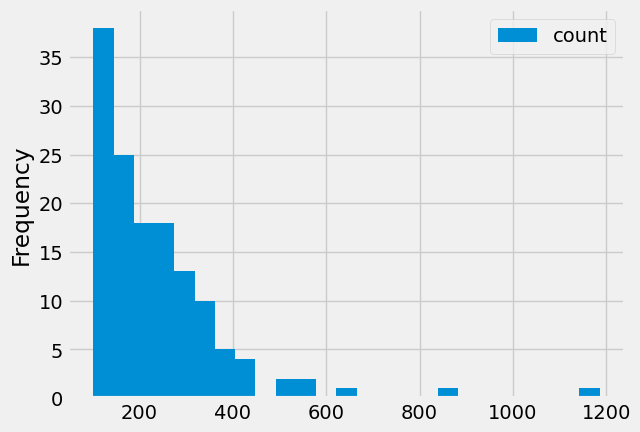

In [34]:
filtered_artists.plot.hist(bins = 25)

In [35]:
filtered_artists.describe()

,count
count,138.000000
mean,236.181159
std,146.196760
min,101.000000
25%,136.250000
50%,204.500000
75%,282.000000
max,1186.000000


### This is amazing- Taylor Swift has made the Top 100 Chart more times than any artist in the past 17 years! (regardless of gender, genre, etc.)

In [36]:
filtered_artists_2 = filtered_artists[filtered_artists['count'] > 500]

In [37]:
filtered_artists_2.value_counts(dropna=False)

artist         count
Drake          881      1
Ed Sheeran     503      1
Jason Aldean   531      1
Luke Bryan     545      1
Morgan Wallen  639      1
Taylor Swift   1186     1
The Weeknd     537      1
Name: count, dtype: int64

Only 7 artists in history have 500 or more top songs. 

#### Review other famous artists for comparison

In [38]:
pd.set_option('display.max_rows', None)

In [39]:
top_10_artists = filtered_artists.head(10)

In [40]:
top_10_artists = pd.DataFrame(top_10_artists.reset_index())

In [41]:
top_10_artists

,index,artist,count
0,0,Taylor Swift,1186
1,1,Drake,881
2,2,Morgan Wallen,639
3,3,Luke Bryan,545
4,4,The Weeknd,537
5,5,Jason Aldean,531
6,6,Ed Sheeran,503
7,7,Imagine Dragons,442
8,8,Luke Combs,434
9,9,Beyonce,425


In [42]:
top_10_artists.columns

Index(['index', 'artist', 'count'], dtype='object')

In [43]:
top_10_artists['artist'].value_counts(dropna=False)

artist
Taylor Swift       1
Drake              1
Morgan Wallen      1
Luke Bryan         1
The Weeknd         1
Jason Aldean       1
Ed Sheeran         1
Imagine Dragons    1
Luke Combs         1
Beyonce            1
Name: count, dtype: int64

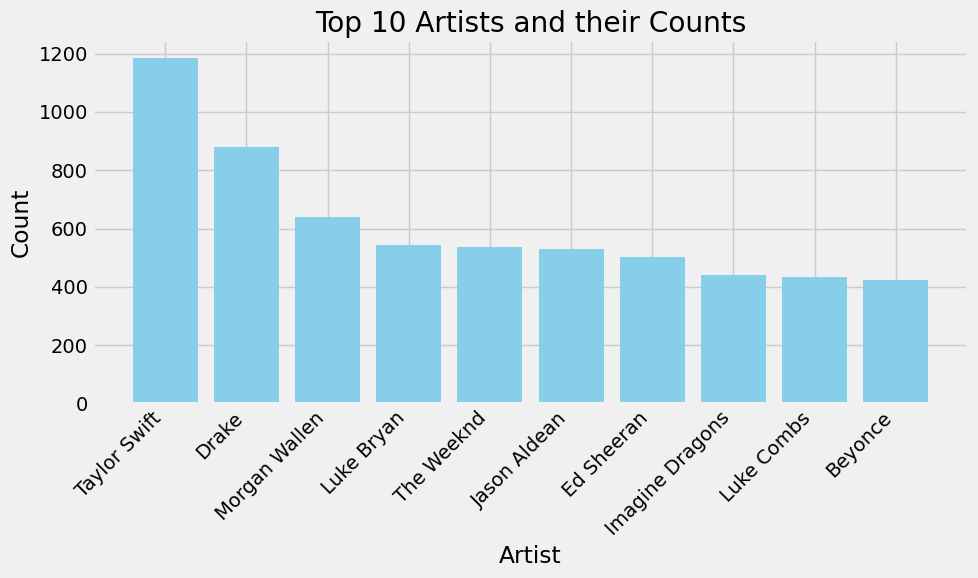

In [44]:
# Visualize difference across artists

plt.figure(figsize=(10, 6))

plt.bar(top_10_artists['artist'], top_10_artists['count'], color='skyblue')

plt.xticks(rotation=45, ha='right')  
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Top 10 Artists and their Counts')


plt.tight_layout()

plt.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'top_10_bill_artists_bar.png'))


In [45]:
top_100_artists = filtered_artists.head(100)

In [46]:
top_100_artists = pd.DataFrame(top_100_artists.reset_index())

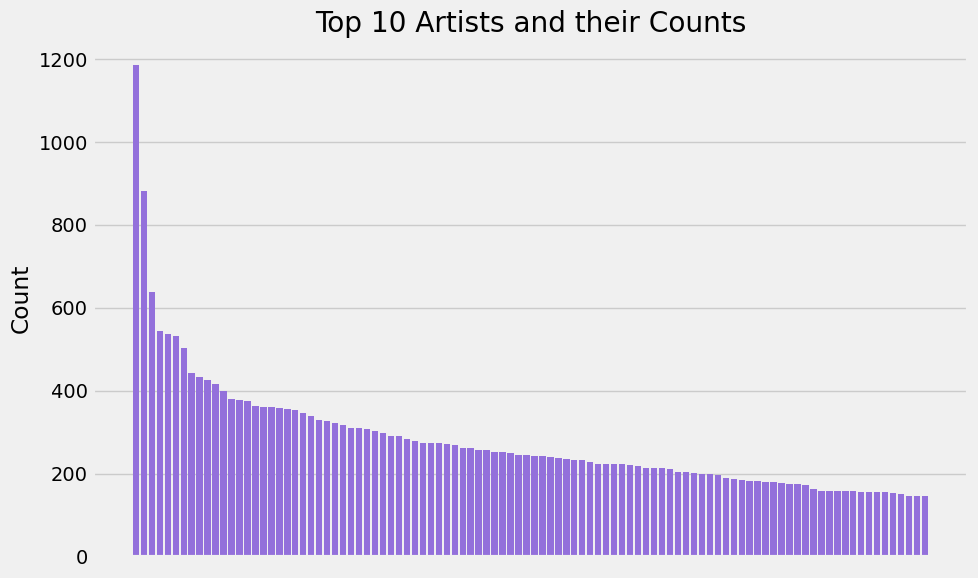

In [47]:
# Visualize difference across artists

plt.figure(figsize=(10, 6))


plt.bar(top_100_artists['artist'], top_100_artists['count'], color='mediumpurple')

plt.xticks([])
plt.ylabel('Artist')
plt.ylabel('Count')
plt.title('Top 10 Artists and their Counts')

 
plt.tight_layout()


plt.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'top_100_bill_artists_bar.png'))


Saved as csv for future use and visualization

### All of this exploration will help decide parameters and scope of time series analysis

### Return to Taylor based sorting

In [48]:
# Using loc to conditionally assign a value based on whether a column includes
# string "Taylor Swift"

data_bill_sub['result'] = 0 # Initialize the 'result' column with zeros
data_bill_sub.loc[data_bill_sub['artist'].str.contains('Taylor Swift'), 'result'] = 1

In [49]:
data_bill_sub.head(100)

,chart_week,current_song_position,song_title,artist,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt,result
0,2023-11-11,1,Is It Over Now? (Taylor's Version) [From The V...,Taylor Swift,1,1,1.0,NaN,1
1,2023-11-11,2,Now That We Don't Talk (Taylor's Version) [Fro...,Taylor Swift,2,1,1.0,NaN,1
2,2023-11-11,3,Slut! (Taylor's Version) [From The Vault],Taylor Swift,3,1,1.0,NaN,1
3,2023-11-11,4,Paint The Town Red,Doja Cat,1,13,0.0,NaN,0
4,2023-11-11,5,Say Don't Go (Taylor's Version) [From The Vault],Taylor Swift,5,1,1.0,NaN,1
5,2023-11-11,6,Cruel Summer,Taylor Swift,1,26,1.0,NaN,1
6,2023-11-11,7,Bad Blood (Taylor's Version),Taylor Swift,7,1,1.0,NaN,1
7,2023-11-11,8,Snooze,SZA,2,47,0.0,NaN,0
8,2023-11-11,9,Style (Taylor's Version),Taylor Swift,9,1,1.0,NaN,1
9,2023-11-11,10,Suburban Legends (Taylor's Version) [From The ...,Taylor Swift,10,1,1.0,NaN,1


So far shows alligns well with original start to 0/1 assignment. Can check once again by seeing if value counts for result match Taylor song count (which was 1186 in the value counts)

In [50]:
data_bill_sub['result'].value_counts(dropna=False)

result
0    77182
1     1418
Name: count, dtype: int64

In [51]:
# Curioous about the difference being with collabs
# Will run again and use == rather than includes

data_bill_sub['result_taylor_only'] = 0
data_bill_sub.loc[data_bill_sub['artist'] == 'Taylor Swift', 'result_taylor_only'] = 1

In [52]:
data_bill_sub['result_taylor_only'].value_counts(dropna=False)

result_taylor_only
0    77414
1     1186
Name: count, dtype: int64

This alligns with Taylor Swift only. 

In [53]:
# Create a subset to show Taylor Swift collaborations

taylor_collab_songs = data_bill_sub[(data_bill_sub['result'] == 1) & (data_bill_sub['result_taylor_only'] == 0)]

In [54]:
taylor_collab_songs

,chart_week,current_song_position,song_title,artist,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt,result,result_taylor_only
430,2023-10-14,31,Karma,Taylor Swift Featuring Ice Spice,2,30,1.0,NaN,1,0
530,2023-10-07,31,Karma,Taylor Swift Featuring Ice Spice,2,29,1.0,NaN,1,0
637,2023-09-30,38,Karma,Taylor Swift Featuring Ice Spice,2,28,1.0,NaN,1,0
735,2023-09-23,36,Karma,Taylor Swift Featuring Ice Spice,2,27,1.0,NaN,1,0
823,2023-09-16,24,Karma,Taylor Swift Featuring Ice Spice,2,26,1.0,NaN,1,0
924,2023-09-09,25,Karma,Taylor Swift Featuring Ice Spice,2,25,1.0,NaN,1,0
1014,2023-09-02,15,Karma,Taylor Swift Featuring Ice Spice,2,24,1.0,NaN,1,0
1113,2023-08-26,14,Karma,Taylor Swift Featuring Ice Spice,2,23,1.0,NaN,1,0
1212,2023-08-19,13,Karma,Taylor Swift Featuring Ice Spice,2,22,1.0,NaN,1,0
1319,2023-08-12,20,Karma,Taylor Swift Featuring Ice Spice,2,21,1.0,NaN,1,0


### This fits perfectly with above- 
- there are 1,418 songs that include Taylor Swift
- 232 songs that include collaborations
- 1,186 songs that are only Taylor Swift

In [55]:
# Delineate songs that are primarily Taylors that feature other artists vs.
# songs that are from other artists and feature Taylor
# Will keep all Taylor only songs and all songs Taylor made with featured artists


data_bill_sub['all_taylor_and_with_collabs'] = 0
data_bill_sub.loc[(data_bill_sub['result_taylor_only'] == 1) | (data_bill_sub['artist'].str.contains('Taylor Swift Featuring')), 'all_taylor_and_with_collabs'] = 1

In [56]:
data_bill_sub['all_taylor_and_with_collabs'].value_counts(dropna=False)

all_taylor_and_with_collabs
0    77271
1     1329
Name: count, dtype: int64

#### Success: Taylor Swift songs (Taylor only or with featured collabs) made the Hot 100 List 1,329 times in the past 17 years

#### Create a count of hot 100 songs (Taylor) for each chart week

In [57]:
# Use group by and count the number of "1" observations for the "all_taylor_and_with_collabs"

chart_wk_sums = data_bill_sub.groupby('chart_week')['all_taylor_and_with_collabs'].sum().reset_index()

In [58]:
# Rename the column to reflect the count

chart_wk_sums = chart_wk_sums.rename(columns={'all_taylor_and_with_collabs': 'count_ts_songs'})

print(chart_wk_sums)

    chart_week  count_ts_songs
0   2008-10-25               1
1   2008-11-01               2
2   2008-11-08               2
3   2008-11-15               3
4   2008-11-22               4
5   2008-11-29               7
6   2008-12-06               2
7   2008-12-13               2
8   2008-12-20               2
9   2008-12-27               2
10  2009-01-03               2
11  2009-01-10               2
12  2009-01-17               2
13  2009-01-24               2
14  2009-01-31               2
15  2009-02-07               2
16  2009-02-14               2
17  2009-02-21               2
18  2009-02-28               3
19  2009-03-07               2
20  2009-03-14               2
21  2009-03-21               3
22  2009-03-28               3
23  2009-04-04               3
24  2009-04-11               3
25  2009-04-18               3
26  2009-04-25               3
27  2009-05-02               2
28  2009-05-09               2
29  2009-05-16               4
30  2009-05-23               3
31  2009

In [59]:
# Sum all the values, should be 1329

chart_wk_sums['count_ts_songs'].sum()

1329

In [60]:
chart_wk_sums.isnull().sum()

chart_week        0
count_ts_songs    0
dtype: int64

In [61]:
chart_wk_sums['count_ts_songs'].value_counts(dropna=False)

count_ts_songs
0     238
2     200
1     195
3      95
4      26
5      10
6       4
20      2
9       2
16      2
18      2
8       2
11      1
10      1
15      1
26      1
7       1
13      1
25      1
22      1
Name: count, dtype: int64

In [62]:
chart_wk_sums.head()

,chart_week,count_ts_songs
0,2008-10-25,1
1,2008-11-01,2
2,2008-11-08,2
3,2008-11-15,3
4,2008-11-22,4


In [63]:
chart_wk_sums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   chart_week      786 non-null    datetime64[ns]
 1   count_ts_songs  786 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.4 KB


In [64]:
chart_wk_sums.head()

,chart_week,count_ts_songs
0,2008-10-25,1
1,2008-11-01,2
2,2008-11-08,2
3,2008-11-15,3
4,2008-11-22,4


## Wrangling steps for time series analysis

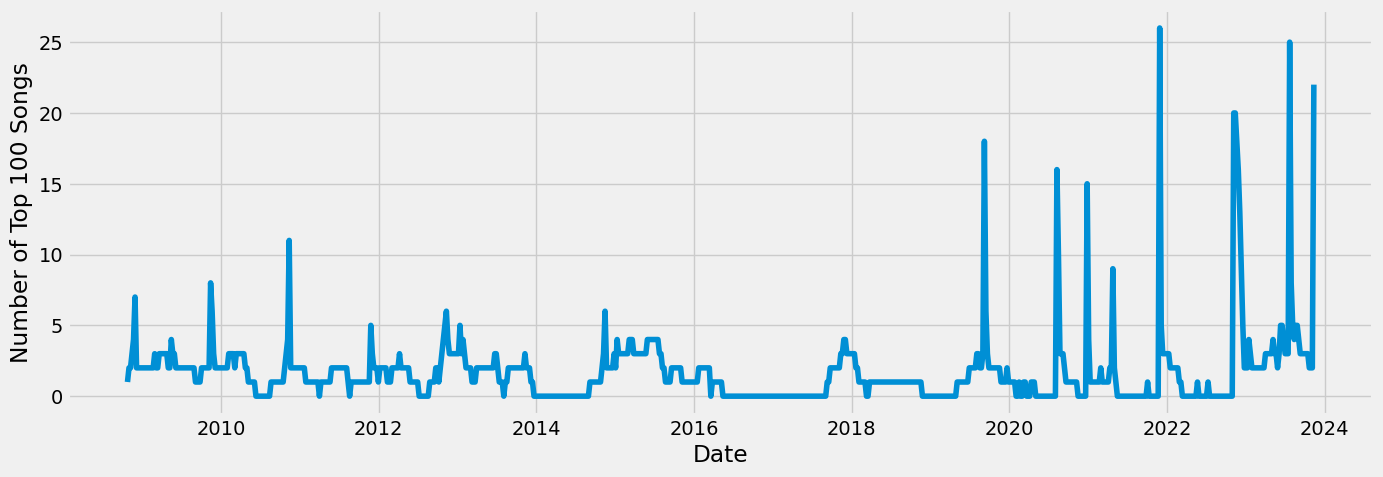

In [65]:
# Convert the 'date' column to datetime format

chart_wk_sums['chart_week'] = pd.to_datetime(chart_wk_sums['chart_week'])

plt.figure(figsize=(15,5), dpi=100)

# Plot the data
plt.plot(chart_wk_sums['chart_week'], chart_wk_sums['count_ts_songs'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Top 100 Songs')

# Show the plot
plt.show()

### Already created subset based on needed date range

# 03. Time series analysis: smoothing data

### Smoothing data

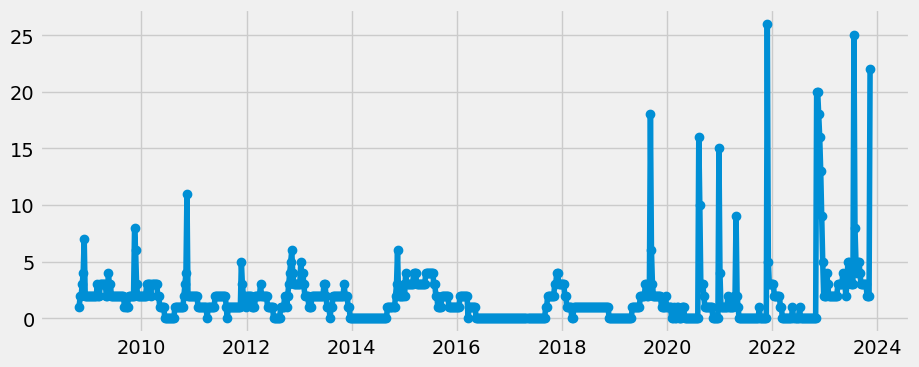

In [66]:
# Plot the original time series data

plt.figure(figsize=(10, 4))
plt.plot(chart_wk_sums['chart_week'], chart_wk_sums['count_ts_songs'], label='Original Data', marker='o')

In [67]:
# Apply a simple moving average (SMA) to smooth out data

window_size = 13
chart_wk_sums['smoothed_cnt'] = chart_wk_sums['count_ts_songs'].rolling(window=window_size).mean()

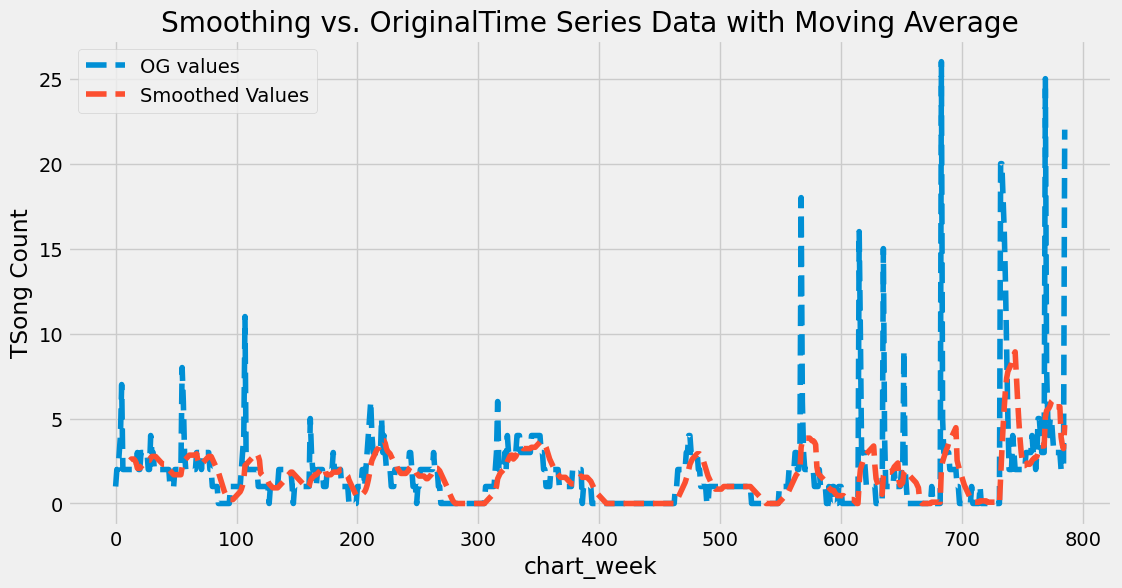

In [68]:
# Plot the smoothed time series data vs. original

plt.figure(figsize=(12, 6))

plt.plot(chart_wk_sums.index, chart_wk_sums['count_ts_songs'], label='OG values', linestyle='--')
plt.plot(chart_wk_sums.index, chart_wk_sums['smoothed_cnt'], label='Smoothed Values', linestyle='--')

         
# Add labels and legend
plt.xlabel('chart_week')
plt.ylabel('TSong Count')
plt.title('Smoothing vs. OriginalTime Series Data with Moving Average')
plt.legend()

# Show the plot
plt.show()



### Quanitify accuracy of the smoothing method with mean squared error 

In [69]:
# Calculate Mean Squared Error (MSE) after smoothing

chart_wk_sums['squared_error'] = (chart_wk_sums['count_ts_songs'] - chart_wk_sums['smoothed_cnt'])**2
mse = chart_wk_sums['squared_error'].mean()

print("Mean Squared Error:", mse)

Mean Squared Error: 5.132172836108435


In [70]:
chart_wk_sums['smoothed_cnt'].value_counts(dropna=False)

smoothed_cnt
0.000000    107
1.000000     33
0.076923     28
1.846154     26
1.692308     23
1.538462     22
1.769231     22
1.615385     20
0.461538     19
0.923077     17
2.307692     17
2.076923     16
1.461538     16
2.538462     15
2.000000     15
2.769231     15
0.230769     14
2.846154     14
0.153846     14
2.615385     14
3.230769     14
2.692308     13
1.307692     13
2.461538     13
0.846154     12
NaN          12
1.153846     12
1.384615     12
0.615385     11
1.076923     11
1.923077     11
1.230769     11
0.307692     10
0.769231     10
2.153846     10
3.307692     10
2.230769     10
0.538462     10
2.923077     10
0.384615      9
2.384615      9
3.846154      8
3.692308      7
3.384615      6
5.692308      5
3.000000      5
3.076923      5
3.461538      5
0.692308      5
3.615385      4
3.538462      4
3.153846      3
4.461538      2
5.769231      2
4.923077      1
5.615385      1
5.076923      1
5.461538      1
5.538462      1
3.923077      1
6.000000      1
6.076923   

In [71]:
chart_wk_sums['count_ts_songs'].value_counts(dropna=False)

count_ts_songs
0     238
2     200
1     195
3      95
4      26
5      10
6       4
20      2
9       2
16      2
18      2
8       2
11      1
10      1
15      1
26      1
7       1
13      1
25      1
22      1
Name: count, dtype: int64

In [72]:
chart_wk_sums['count_ts_songs'].max()

26

In [73]:
chart_wk_sums['count_ts_songs'].min()

0

In [74]:
# Calculate percentage of mse relative to range

(5.13 / 26)*100

19.73076923076923

In [75]:
# Normalize for value between 0 and 1

normalized = 5.13 / 26

print(normalized)

0.1973076923076923


### This smoothing method doesn't seem to work well, trying Exponential Smoothing

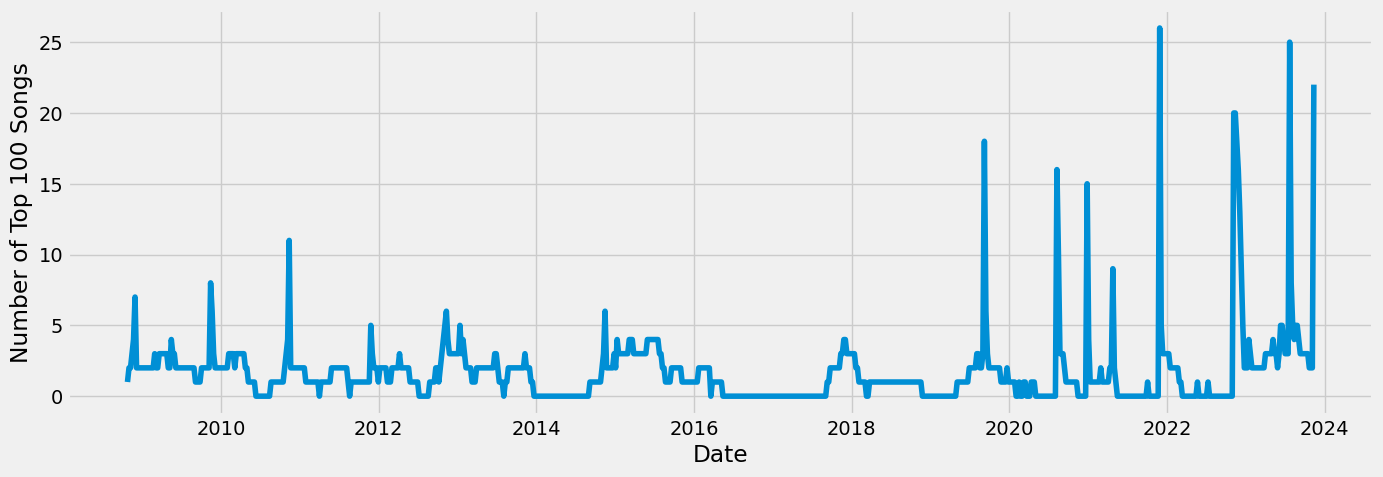

In [76]:
# Rerun original plot for comparison

plt.figure(figsize=(15,5), dpi=100)

# Plot the data
plt.plot(chart_wk_sums['chart_week'], chart_wk_sums['count_ts_songs'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Top 100 Songs')

# Show the plot
plt.show()

In [77]:
# Set 'date' as the index

chart_wk_sums.set_index('chart_week', inplace=True)

In [78]:
# Fit Exponential Smoothing method

model = SimpleExpSmoothing(chart_wk_sums['count_ts_songs'])
result = model.fit()

In [79]:
# Get smoothed values
chart_wk_sums['smoothed_values'] = result.fittedvalues

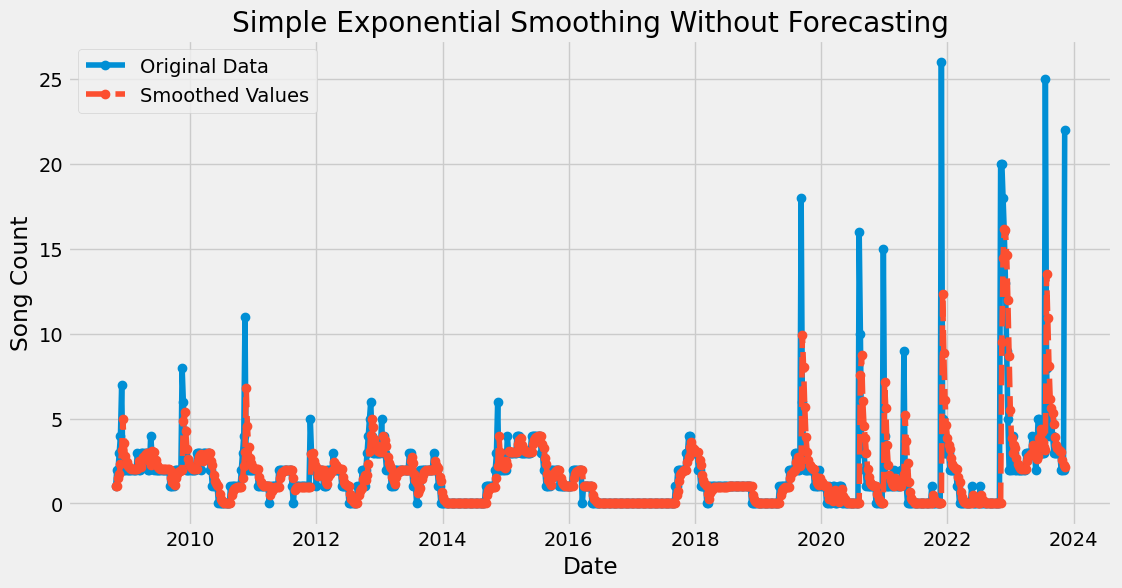

In [80]:
# Plot original data and smoothed values
plt.figure(figsize=(12, 6))
plt.plot(chart_wk_sums.index, chart_wk_sums['count_ts_songs'], label='Original Data', marker='o')
plt.plot(chart_wk_sums.index, chart_wk_sums['smoothed_values'], label='Smoothed Values', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Song Count')
plt.title('Simple Exponential Smoothing Without Forecasting')
plt.legend()
plt.show()

In [81]:
# Calculate Mean Squared Error (MSE) after smoothing

chart_wk_sums['squared_error_2'] = (chart_wk_sums['count_ts_songs'] - chart_wk_sums['smoothed_values'])**2
mse2 = chart_wk_sums['squared_error_2'].mean()

print("Mean Squared Error:", mse)

Mean Squared Error: 5.132172836108435


In [82]:
normalized_2 = 4.7454/26

print(normalized_2)

0.1825153846153846


###Observations: While log smoothing did help to some extent and the exponential smoothing had a slightly higher mean squared error, the exponential smoothing seems to both smooth the data while also capturing a certain amount of peaks in song counts- which is important. Will attempt decomposition with the exponentially smoothed df and return to other smoothing options if needed. 

In [83]:
chart_wk_sums.columns

Index(['count_ts_songs', 'smoothed_cnt', 'squared_error', 'smoothed_values',
       'squared_error_2'],
      dtype='object')

In [84]:
# Create dataframe that uses date as index and the expontential smoothing values 'squared_error_2' as the values 

data_sub = chart_wk_sums[['squared_error_2']]

In [85]:
data_sub.head()

,squared_error_2
chart_week,
2008-10-25,0.000000
2008-11-01,1.000000
2008-11-08,0.276255
2008-11-15,1.628827
2008-11-22,2.791571


In [86]:
data_sub.tail()

,squared_error_2
chart_week,
2023-10-14,0.004615
2023-10-21,1.072688
2023-10-28,0.296336
2023-11-04,0.081864
2023-11-11,394.007247


In [87]:
data_sub.dtypes

squared_error_2    float64
dtype: object

# 04. Time series analysis: decomposition

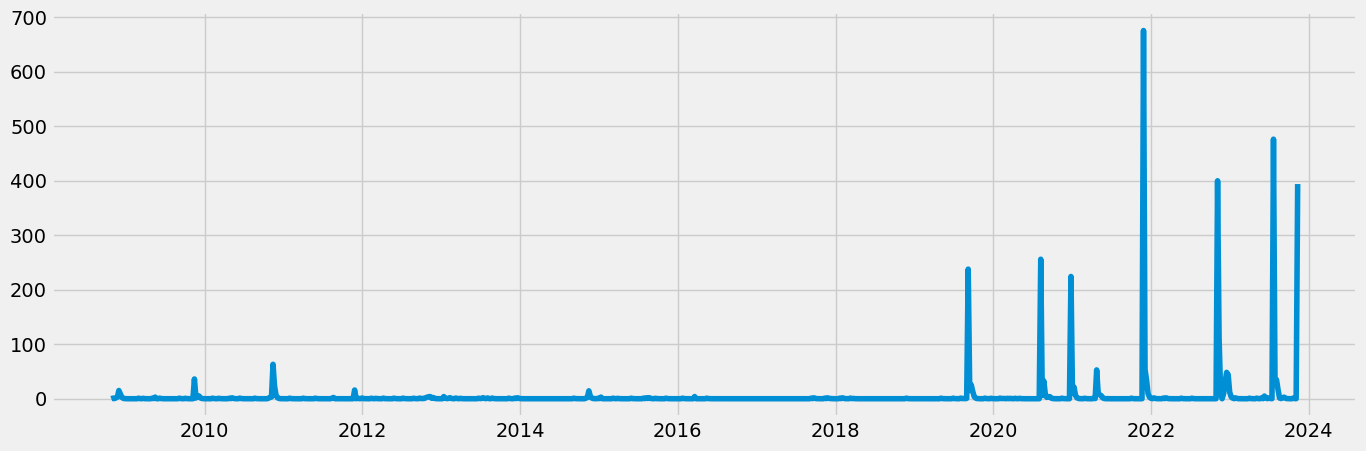

In [88]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [89]:
# Decompose the time series using an additive modelb

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [90]:
# Define fixed size for special charts

from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

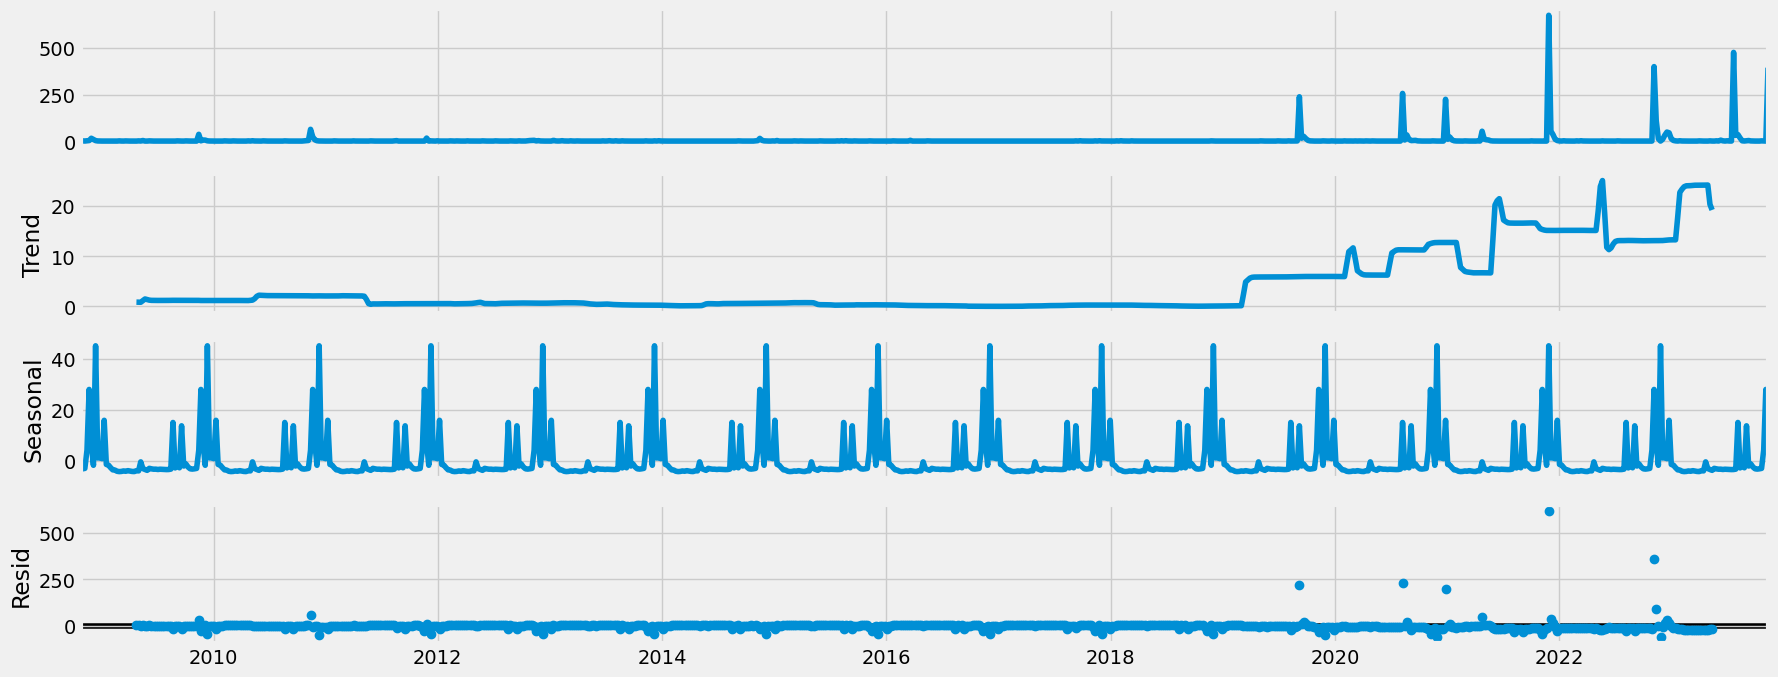

In [91]:
# Plot the separate components

decomposition.plot()
plt.show()

Observations:
- The dominant trend line shows trends that are from 2008-2019 in a fairly pleateaued trend, with a shift into an upward rise with multiple peaks from 2019-2023. 
- There is seasonality to this data
- There is quite a bit of unexplained noise leftover after the trend and seasonality are extracted, especially from 2019 onwards

#### Because there are both trends and seasonality, this data is non-stationary

- I am curious about focusing on 2019 onwards, especially since that is the beginning of Taylor owning her work (either as original albums (like Lover), or as Taylor's Version re-records (like REDTV)
- It could be important to show this as a line plot overall, then focus on the 2019 onward for time series forecasting

# 05. Return to subsetting
### Based on initial decomposition visual, I am choosing to focus on the time frame from August 23rd, 2019 through November 11th, 2023.
### This includes the following originals that Taylor owns as masters: Lover, folklore, evermore, Midnights
### as well as all Taylor's Versions: Fearless(TV), Red(TV), Speak Now(TV), 1989(TV)

In [92]:
# utilize bill_sub prior to get dataframe based on new date range
# This will include all of the song and artist data, which will be handy for future reference

data_bill_sub.head()

,chart_week,current_song_position,song_title,artist,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt,result,result_taylor_only,all_taylor_and_with_collabs
0,2023-11-11,1,Is It Over Now? (Taylor's Version) [From The V...,Taylor Swift,1,1,1.0,NaN,1,1,1
1,2023-11-11,2,Now That We Don't Talk (Taylor's Version) [Fro...,Taylor Swift,2,1,1.0,NaN,1,1,1
2,2023-11-11,3,Slut! (Taylor's Version) [From The Vault],Taylor Swift,3,1,1.0,NaN,1,1,1
3,2023-11-11,4,Paint The Town Red,Doja Cat,1,13,0.0,NaN,0,0,0
4,2023-11-11,5,Say Don't Go (Taylor's Version) [From The Vault],Taylor Swift,5,1,1.0,NaN,1,1,1


In [93]:
data_bill_sub.columns

Index(['chart_week', 'current_song_position', 'song_title', 'artist',
       'song_peak_pos', 'song_wks_on_chart', 'taylor', 'wk_top_s_cnt',
       'result', 'result_taylor_only', 'all_taylor_and_with_collabs'],
      dtype='object')

In [94]:
data_bill_sub['chart_week'].dtype

dtype('<M8[ns]')

In [95]:
# Create dataframe with values 10/24/2008 onward

df_sub2 = data_bill_sub.loc[(data_bill_sub['chart_week'] > '08/23/2019')]

In [96]:
df_sub2.head()

,chart_week,current_song_position,song_title,artist,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt,result,result_taylor_only,all_taylor_and_with_collabs
0,2023-11-11,1,Is It Over Now? (Taylor's Version) [From The V...,Taylor Swift,1,1,1.0,NaN,1,1,1
1,2023-11-11,2,Now That We Don't Talk (Taylor's Version) [Fro...,Taylor Swift,2,1,1.0,NaN,1,1,1
2,2023-11-11,3,Slut! (Taylor's Version) [From The Vault],Taylor Swift,3,1,1.0,NaN,1,1,1
3,2023-11-11,4,Paint The Town Red,Doja Cat,1,13,0.0,NaN,0,0,0
4,2023-11-11,5,Say Don't Go (Taylor's Version) [From The Vault],Taylor Swift,5,1,1.0,NaN,1,1,1


In [97]:
df_sub2.columns

Index(['chart_week', 'current_song_position', 'song_title', 'artist',
       'song_peak_pos', 'song_wks_on_chart', 'taylor', 'wk_top_s_cnt',
       'result', 'result_taylor_only', 'all_taylor_and_with_collabs'],
      dtype='object')

In [98]:
df_sub2.tail()

,chart_week,current_song_position,song_title,artist,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt,result,result_taylor_only,all_taylor_and_with_collabs
22095,2019-08-24,96,What If I Never Get Over You,Lady Antebellum,86,3,NaN,NaN,0,0,0
22096,2019-08-24,97,Tap,NAV Featuring Meek Mill,87,10,NaN,NaN,0,0,0
22097,2019-08-24,98,La La Land,Bryce Vine Featuring YG,75,11,NaN,NaN,0,0,0
22098,2019-08-24,99,Que Pretendes,J Balvin & Bad Bunny,65,5,NaN,NaN,0,0,0
22099,2019-08-24,100,Single Again,Big Sean,64,3,NaN,NaN,0,0,0


In [99]:
# Count number of total weeks/chart weeks in date range aug 2019- nov 2023

number_chart_weeks = df_sub2['chart_week'].nunique()

print(number_chart_weeks)

221


In [100]:
# Break down to list of only Taylor Swif songs, with all song info

ts_sub2 = df_sub2.loc[(df_sub2['all_taylor_and_with_collabs'] == 1)]

In [101]:
ts_sub2.head()

,chart_week,current_song_position,song_title,artist,song_peak_pos,song_wks_on_chart,taylor,wk_top_s_cnt,result,result_taylor_only,all_taylor_and_with_collabs
0,2023-11-11,1,Is It Over Now? (Taylor's Version) [From The V...,Taylor Swift,1,1,1.0,NaN,1,1,1
1,2023-11-11,2,Now That We Don't Talk (Taylor's Version) [Fro...,Taylor Swift,2,1,1.0,NaN,1,1,1
2,2023-11-11,3,Slut! (Taylor's Version) [From The Vault],Taylor Swift,3,1,1.0,NaN,1,1,1
4,2023-11-11,5,Say Don't Go (Taylor's Version) [From The Vault],Taylor Swift,5,1,1.0,NaN,1,1,1
5,2023-11-11,6,Cruel Summer,Taylor Swift,1,26,1.0,NaN,1,1,1


In [102]:
ts_sub2.shape

(509, 11)

In [103]:
# Utilize prior df grouped by data and Taylor only, and now filter for date range

chart_wk_sums.head()

,count_ts_songs,smoothed_cnt,squared_error,smoothed_values,squared_error_2
chart_week,,,,,
2008-10-25,1,NaN,NaN,1.000000,0.000000
2008-11-01,2,NaN,NaN,1.000000,1.000000
2008-11-08,2,NaN,NaN,1.474400,0.276255
2008-11-15,3,NaN,NaN,1.723745,1.628827
2008-11-22,4,NaN,NaN,2.329201,2.791571


In [104]:
chart_wk_sums.reset_index(inplace=True)

In [105]:
chart_wk_sums.dtypes

chart_week         datetime64[ns]
count_ts_songs              int64
smoothed_cnt              float64
squared_error             float64
smoothed_values           float64
squared_error_2           float64
dtype: object

In [106]:
# Filter sub for date range August 23rd 2019 onward

ts_eras_sub = chart_wk_sums.loc[(chart_wk_sums['chart_week'] > '08/23/2019')]

In [107]:
ts_eras_sub.head()

,chart_week,count_ts_songs,smoothed_cnt,squared_error,smoothed_values,squared_error_2
565,2019-08-24,2,1.846154,0.023669,2.374542,0.140282
566,2019-08-31,3,2.000000,1.000000,2.196859,0.645035
567,2019-09-07,18,3.307692,215.863905,2.577869,237.842114
568,2019-09-14,6,3.692308,5.325444,9.894131,15.164258
569,2019-09-21,3,3.846154,0.715976,8.046755,25.469732


In [108]:
ts_eras_sub.shape

(221, 6)

In [109]:
ts_eras_sub.tail()

,chart_week,count_ts_songs,smoothed_cnt,squared_error,smoothed_values,squared_error_2
781,2023-10-14,3,5.692308,7.248521,3.067935,0.004615
782,2023-10-21,2,3.923077,3.698225,3.035706,1.072688
783,2023-10-28,2,3.461538,2.136095,2.544367,0.296336
784,2023-11-04,2,3.230769,1.514793,2.286119,0.081864
785,2023-11-11,22,4.615385,302.224852,2.150384,394.007247


In [110]:
ts_eras_sub['count_ts_songs'].value_counts(dropna=False)

count_ts_songs
0     86
1     41
2     37
3     28
5      7
4      6
16     2
9      2
18     2
20     2
10     1
15     1
6      1
26     1
13     1
25     1
8      1
22     1
Name: count, dtype: int64

### This shows that Taylor has had 135 out of 221 chart weeks with a top song and 509 songs that have made the Billboard Hot 100 since August 23rd, 2019. 

In [111]:
# Remove prior calculations from smoothing to restart with subset data

ts_eras_sub.columns

Index(['chart_week', 'count_ts_songs', 'smoothed_cnt', 'squared_error',
       'smoothed_values', 'squared_error_2'],
      dtype='object')

In [112]:
ts_eras_sub.drop(columns=['smoothed_cnt', 'squared_error',
       'smoothed_values', 'squared_error_2'], inplace=True)

In [113]:
ts_eras_sub.head()

,chart_week,count_ts_songs
565,2019-08-24,2
566,2019-08-31,3
567,2019-09-07,18
568,2019-09-14,6
569,2019-09-21,3


In [114]:
ts_eras_sub.dtypes

chart_week        datetime64[ns]
count_ts_songs             int64
dtype: object

In [115]:
ts_eras_sub.isnull().sum()

chart_week        0
count_ts_songs    0
dtype: int64

In [116]:
ts_eras_sub.shape

(221, 2)

In [117]:
ts_eras_sub.columns

Index(['chart_week', 'count_ts_songs'], dtype='object')

## Smoothing updated date range data

In [118]:
# Set the "chart_week" column as the index

ts_eras_sub['datetime'] = pd.to_datetime(ts_eras_sub['chart_week']) 
ts_eras_sub = ts_eras_sub.set_index('datetime') 
ts_eras_sub.drop(['chart_week'], axis=1, inplace=True) 
ts_eras_sub.head()

,count_ts_songs
datetime,
2019-08-24,2
2019-08-31,3
2019-09-07,18
2019-09-14,6
2019-09-21,3


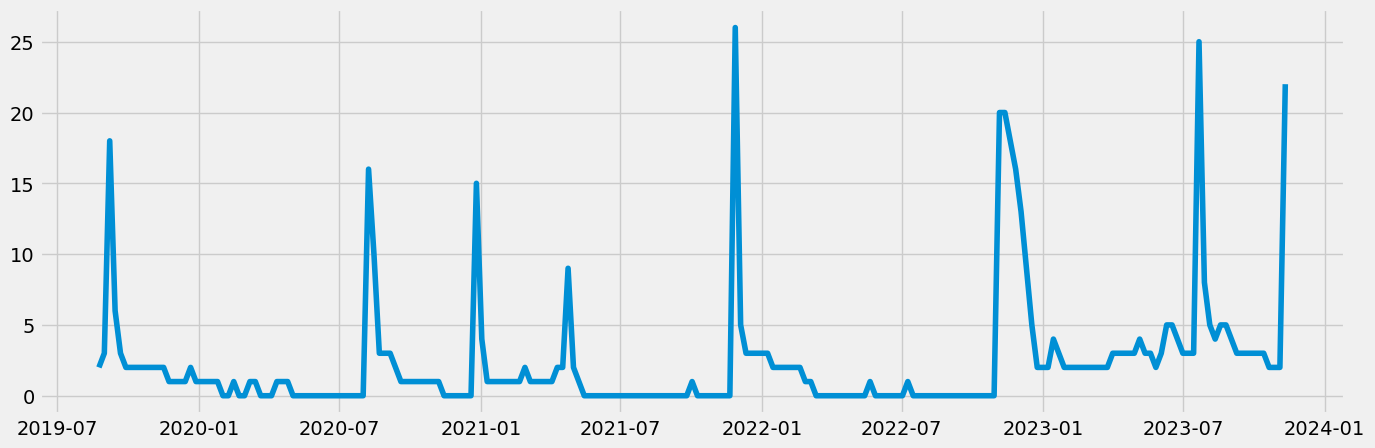

In [119]:
# Plot data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(ts_eras_sub)

This figure shows hints of seasonality and is very likely non stationary. I will use smoothing to help reduce noise.

In [120]:
# Fit Exponential Smoothing method

expo_model = SimpleExpSmoothing(ts_eras_sub['count_ts_songs'])
result = model.fit()

In [121]:
# Get smoothed values

ts_eras_sub['smoothed_values'] = result.fittedvalues

In [122]:
ts_eras_sub.head()

,count_ts_songs,smoothed_values
datetime,,
2019-08-24,2,2.374542
2019-08-31,3,2.196859
2019-09-07,18,2.577869
2019-09-14,6,9.894131
2019-09-21,3,8.046755


In [123]:
ts_eras_sub['smoothed_values'].head()

datetime
2019-08-24    2.374542
2019-08-31    2.196859
2019-09-07    2.577869
2019-09-14    9.894131
2019-09-21    8.046755
Name: smoothed_values, dtype: float64

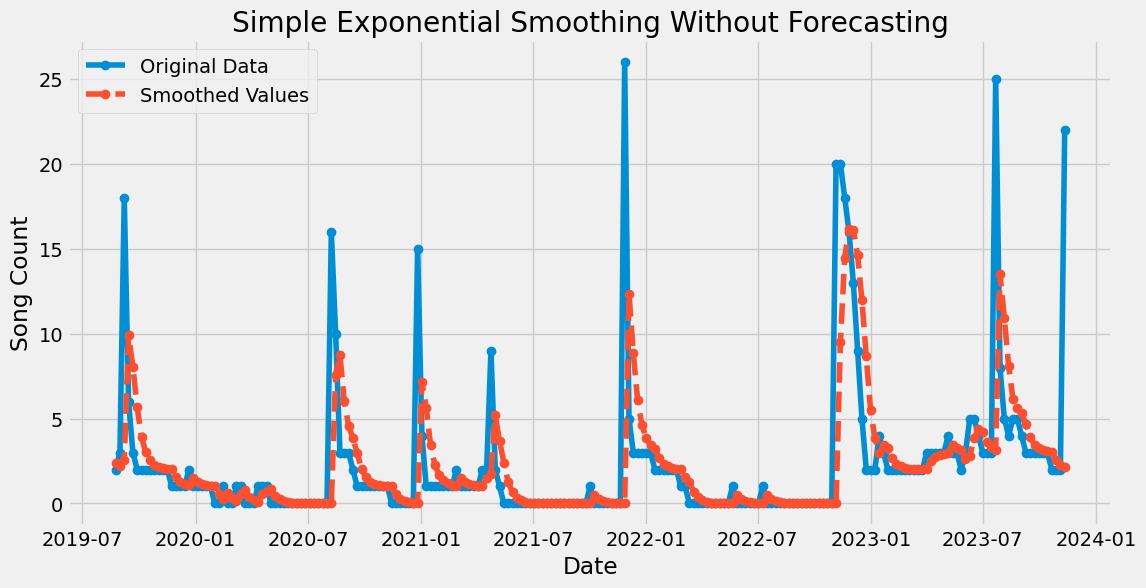

In [124]:
# Plot original data and smoothed values
plt.figure(figsize=(12, 6))
plt.plot(ts_eras_sub.index, ts_eras_sub['count_ts_songs'], label='Original Data', marker='o')
plt.plot(ts_eras_sub.index, ts_eras_sub['smoothed_values'], label='Smoothed Values', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Song Count')
plt.title('Simple Exponential Smoothing Without Forecasting')
plt.legend()
plt.show()

I do feel concerned about the lack of overlap with the most recent spike- 1989TV- since it is such a key performance indicator. Will mean squared error testing.

In [125]:
# Calculate Mean Squared Error (MSE) after smoothing

ts_eras_sub['squared_error_2'] = (ts_eras_sub['count_ts_songs'] - ts_eras_sub['smoothed_values'])**2
mse_ts_eras_sub = ts_eras_sub['squared_error_2'].mean()

print("Mean Squared Error:", mse_ts_eras_sub)

Mean Squared Error: 15.400281247555922


Very large MSE. Will try log smoothing.

## Moving average smoothing

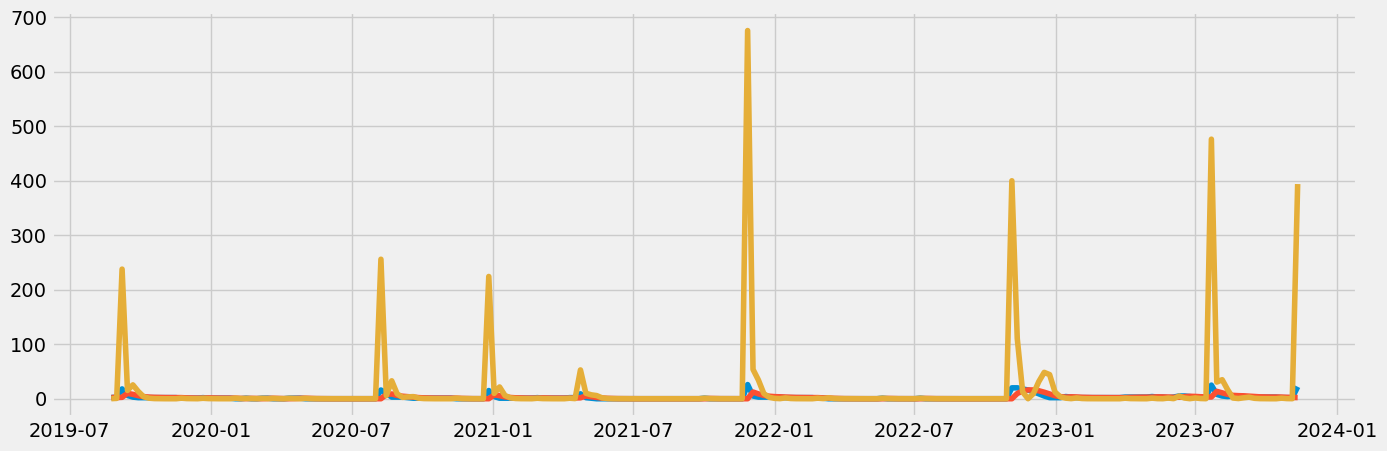

In [126]:
# original data

plt.figure(figsize=(15,5), dpi=100)
plt.plot(ts_eras_sub)

In [127]:
# Apply a simple moving average (SMA) to smooth out data

window_size = 13
ts_eras_sub['smoothed_cnt'] = ts_eras_sub['count_ts_songs'].rolling(window=window_size).mean()

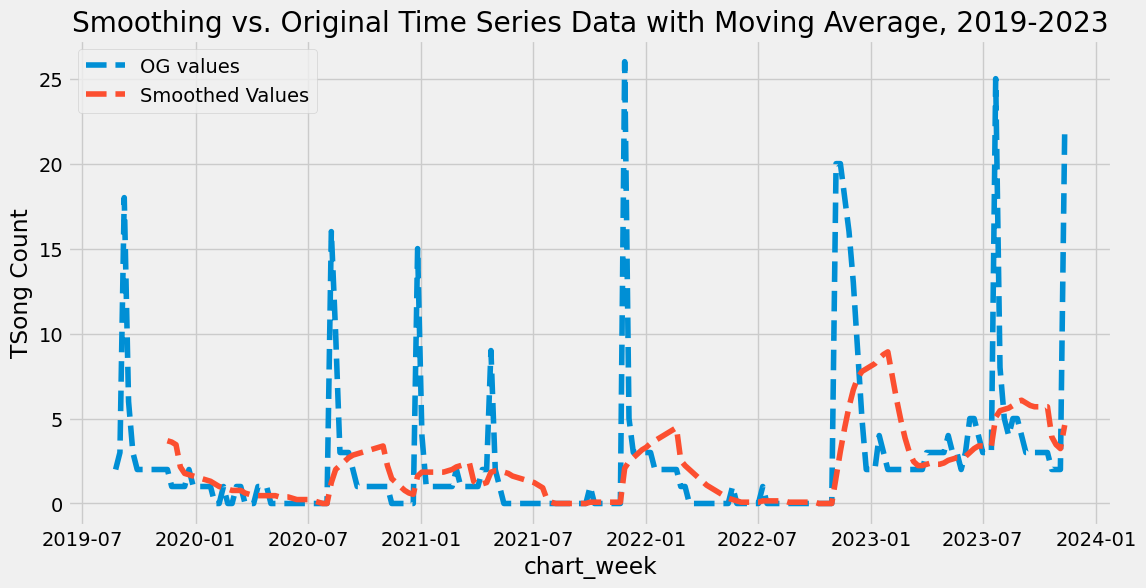

In [128]:
# Plot the smoothed time series data vs. original

plt.figure(figsize=(12, 6))

plt.plot(ts_eras_sub.index, ts_eras_sub['count_ts_songs'], label='OG values', linestyle='--')
plt.plot(ts_eras_sub.index, ts_eras_sub['smoothed_cnt'], label='Smoothed Values', linestyle='--')

         
# Add labels and legend
plt.xlabel('chart_week')
plt.ylabel('TSong Count')
plt.title('Smoothing vs. Original Time Series Data with Moving Average, 2019-2023')
plt.legend()

# Show the plot
plt.show()


In [129]:
# Quanitify accuracy of the smoothing method with mean squared error 
# Calculate Mean Squared Error (MSE) after smoothing

ts_eras_sub['squared_error'] = (ts_eras_sub['count_ts_songs'] - ts_eras_sub['smoothed_cnt'])**2
mse_ts_eras_sub_2 = ts_eras_sub['squared_error'].mean()

print("Mean Squared Error:", mse_ts_eras_sub_2)

Mean Squared Error: 15.623142040146085


#### Observations: much large mean squared error (and therefore less accurate than with entire dataframe). Curious to try decomposing to view trend, seasonality, and noise.

In [130]:
ts_eras_sub['smoothed_cnt'].value_counts(dropna=False)

smoothed_cnt
0.076923    22
0.000000    14
NaN         12
1.846154     8
0.153846     8
0.461538     7
2.230769     6
0.230769     6
0.769231     5
5.692308     5
3.384615     5
1.307692     4
2.307692     4
2.692308     4
1.230769     4
1.538462     4
1.615385     3
3.000000     3
1.923077     3
2.461538     3
2.384615     3
2.000000     3
1.769231     3
1.076923     3
0.384615     3
1.461538     3
0.615385     3
0.923077     3
3.230769     3
3.307692     2
1.153846     2
3.846154     2
5.769231     2
4.461538     2
2.538462     2
3.461538     2
3.692308     2
3.153846     2
2.923077     2
2.153846     2
0.307692     2
0.538462     2
1.384615     2
3.076923     2
1.000000     2
8.769231     1
5.076923     1
7.538462     1
6.153846     1
4.923077     1
2.615385     1
2.769231     1
5.538462     1
5.461538     1
3.923077     1
5.615385     1
6.000000     1
5.923077     1
6.076923     1
8.923077     1
2.076923     1
8.538462     1
8.230769     1
8.076923     1
7.923077     1
7.769231    

In [131]:
# Fill na values with 0

ts_eras_sub['smoothed_cnt'].fillna(0, inplace=True)

In [132]:
ts_eras_sub['smoothed_cnt'].value_counts(dropna=False)

smoothed_cnt
0.000000    26
0.076923    22
0.153846     8
1.846154     8
0.461538     7
2.230769     6
0.230769     6
0.769231     5
3.384615     5
5.692308     5
2.692308     4
1.230769     4
2.307692     4
1.307692     4
1.538462     4
1.769231     3
2.461538     3
2.000000     3
1.461538     3
1.923077     3
0.923077     3
2.384615     3
0.384615     3
3.230769     3
1.076923     3
0.615385     3
3.000000     3
1.615385     3
3.692308     2
5.769231     2
4.461538     2
2.538462     2
3.846154     2
3.307692     2
2.153846     2
3.153846     2
1.000000     2
2.923077     2
3.461538     2
0.307692     2
0.538462     2
3.076923     2
1.384615     2
1.153846     2
6.153846     1
4.923077     1
2.615385     1
2.769231     1
5.076923     1
5.538462     1
5.461538     1
8.923077     1
5.615385     1
1.692308     1
6.000000     1
6.076923     1
5.923077     1
3.923077     1
7.538462     1
7.923077     1
8.769231     1
8.538462     1
8.230769     1
8.076923     1
7.769231     1
7.384615    

In [133]:
ts_era_decomp = ts_eras_sub[['smoothed_cnt']]

In [134]:
ts_era_decomp.head()

,smoothed_cnt
datetime,
2019-08-24,0.0
2019-08-31,0.0
2019-09-07,0.0
2019-09-14,0.0
2019-09-21,0.0


# 06. Decomposition with new subset

In [135]:
# Decompose the time series using an additive model

decomposition2 = sm.tsa.seasonal_decompose(ts_era_decomp, model='additive')

In [136]:
rcParams['figure.figsize'] = 18, 7


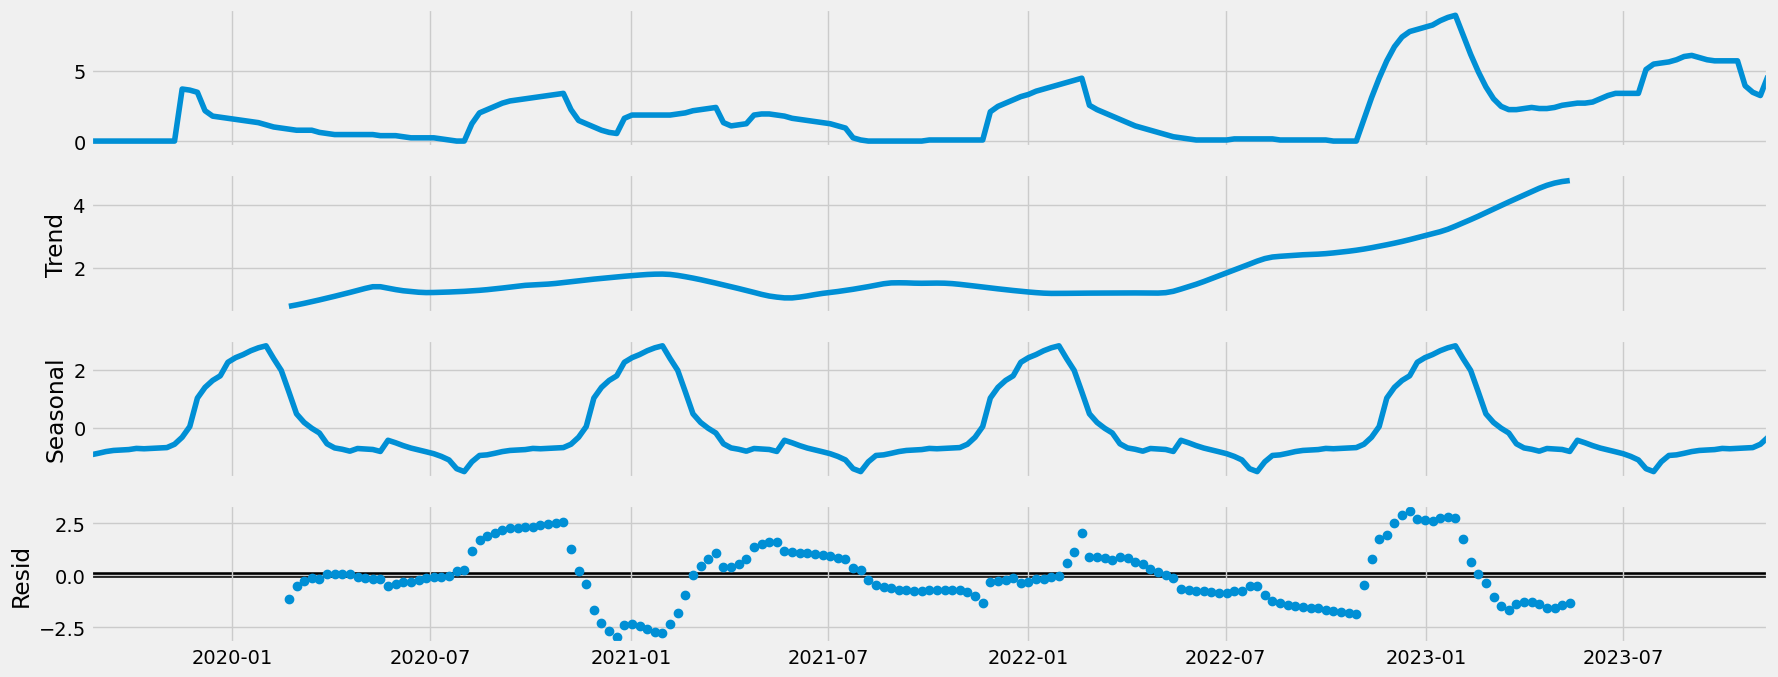

In [137]:
# Plot the separate components

decomposition2.plot()
plt.show()

Observations: compared to the entire data set (2008-2023), this breakdown shows affects related to seasonality. There is still noise, particularly around peaks.

In [138]:
ts_eras_sub.columns

Index(['count_ts_songs', 'smoothed_values', 'squared_error_2', 'smoothed_cnt',
       'squared_error'],
      dtype='object')

In [139]:
# Create non-smoothed df

ts_eras_no_smooth = ts_eras_sub[['count_ts_songs']]

In [140]:
ts_eras_no_smooth.head()

,count_ts_songs
datetime,
2019-08-24,2
2019-08-31,3
2019-09-07,18
2019-09-14,6
2019-09-21,3


In [141]:
# Print the plot of the smaller time range, but
# without exponential smoothing

# Decompose the time series using an additive model

decomposition3 = sm.tsa.seasonal_decompose(ts_eras_no_smooth, model='additive')


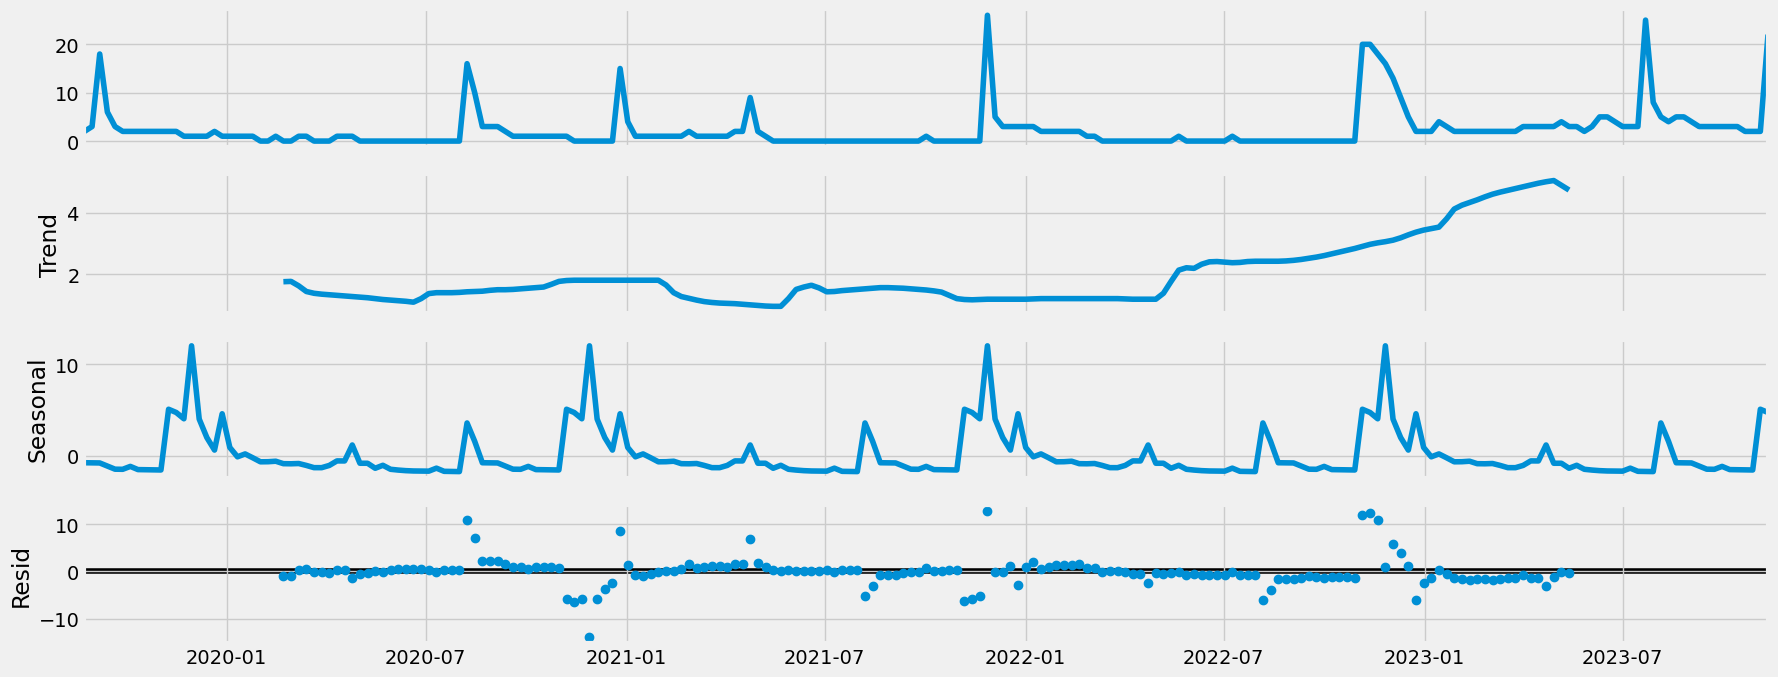

In [142]:
decomposition3.plot()
plt.show()

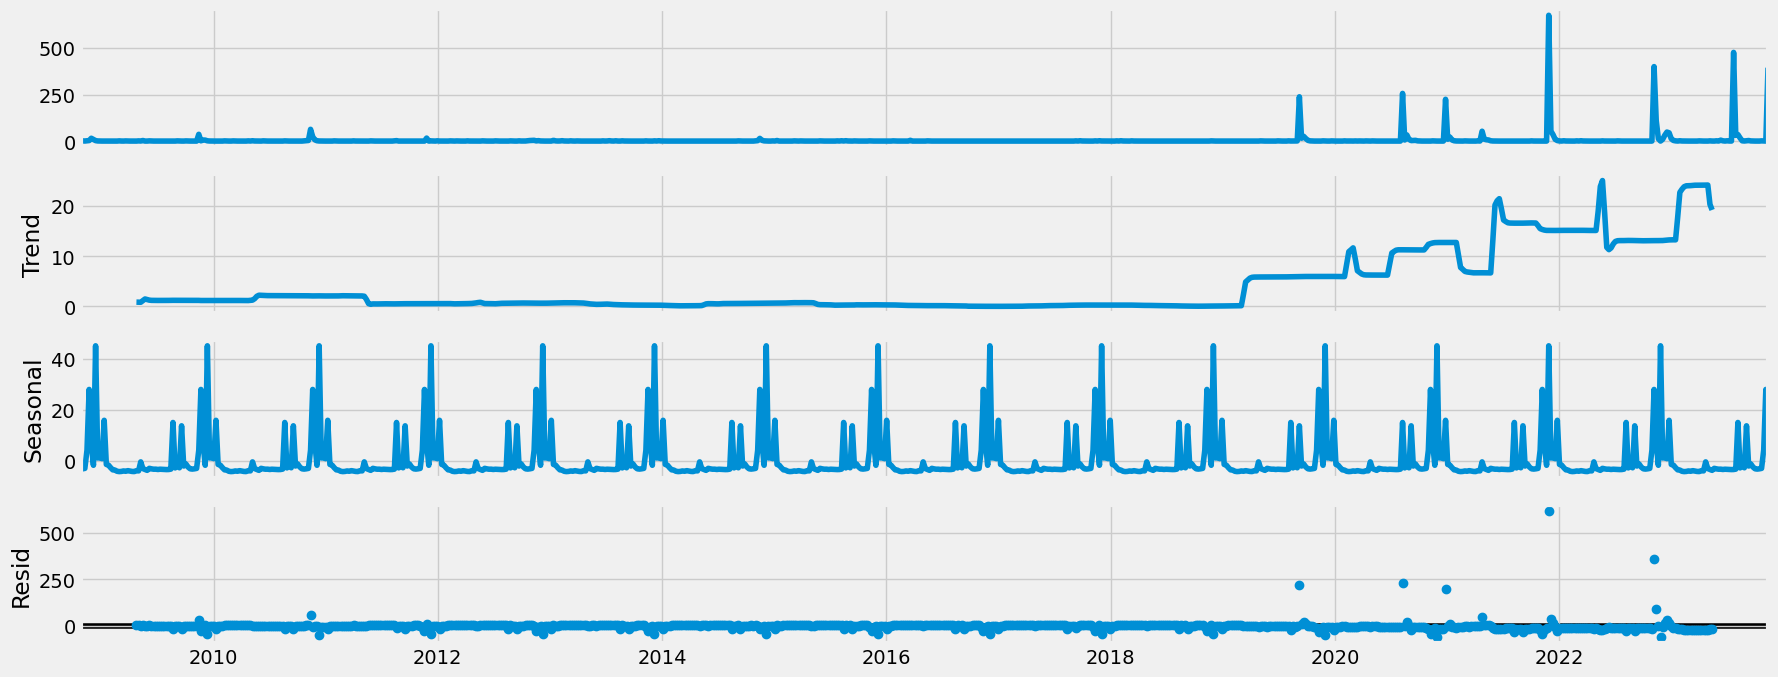

In [143]:
# Print prior plot to see which decomposition series of steps was more helpful

# Plot the separate components

decomposition.plot()
plt.show()

## Because the smoothing mean squared error was so high and the non=smoothed 2019-2023 dataframe has less or similar noise, I will attempt to use the ts_eras_no_smooth df

In [144]:
# rename for ease

ts_era_og = ts_eras_no_smooth

In [145]:
ts_era_og['count_ts_songs'].value_counts(dropna=False)

count_ts_songs
0     86
1     41
2     37
3     28
5      7
4      6
16     2
9      2
18     2
20     2
10     1
15     1
6      1
26     1
13     1
25     1
8      1
22     1
Name: count, dtype: int64

# 07. Testing for stationarity with the Dickey-Fuller test

In [146]:
# Define and run the Dickey Fuller test

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(ts_era_og['count_ts_songs'])

Dickey-Fuller Stationarity test:
Test Statistic                -7.885464e+00
p-value                        4.582442e-12
Number of Lags Used            0.000000e+00
Number of Observations Used    2.200000e+02
Critical Value (1%)           -3.460428e+00
Critical Value (5%)           -2.874769e+00
Critical Value (10%)          -2.573821e+00
dtype: float64


Observations: 
- A test statistic greater than the critical value means cannot reject null
- A test stat less than the critical value means can reject the null
- My test statistic is -7.88, which is less than the -3.48 critical value at 1% 

- The p-value is also under 0.05

- This means that I can reject the null hypothsesis and supports the hypothesis that this data is stationary

# 08. Check for autocorrelations

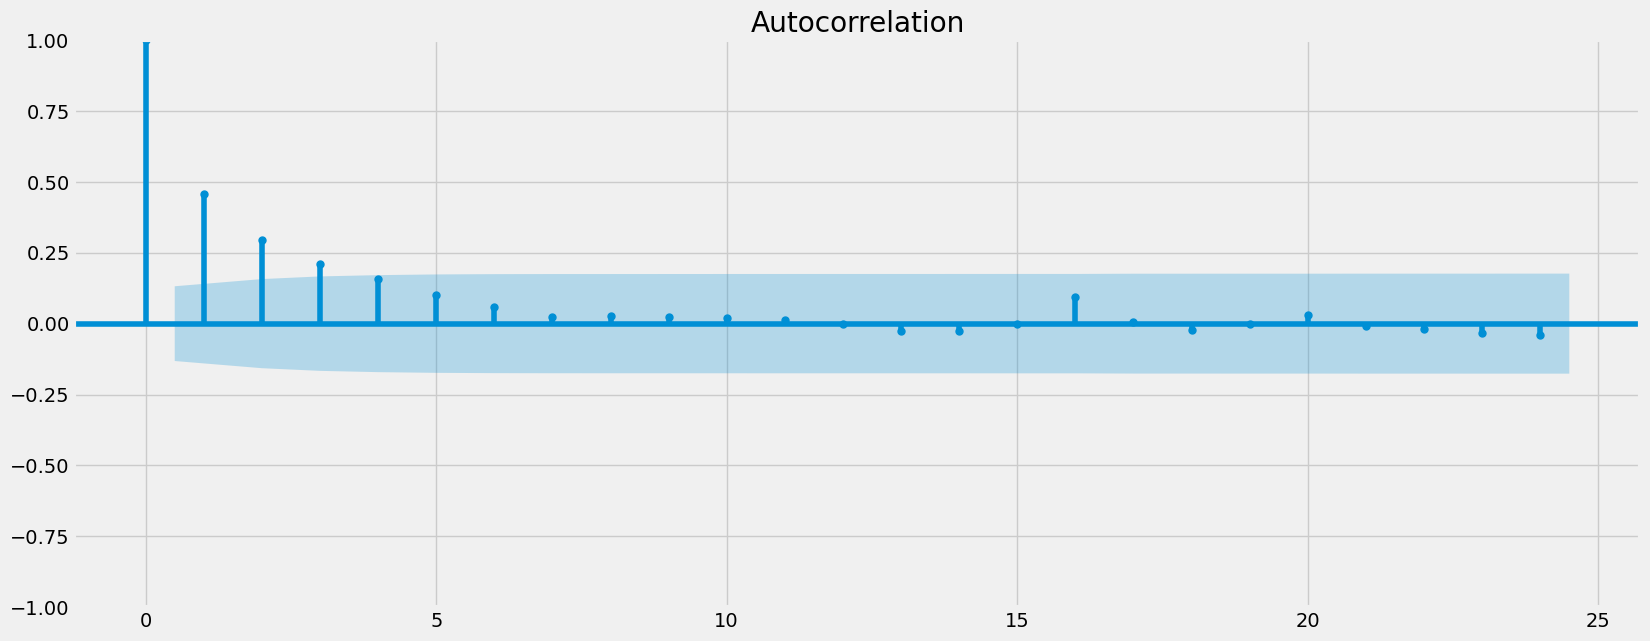

In [147]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(ts_era_og)
plt.show()

The data only has 4 lines outside of the confidence interval. This suggests that there is not significant autocorrelation with the time series data.

# Data is processed as time series and ready for time series forecasting 
- ## I was able to reject null hypothesis with Dickey-Fuller test
- ## shows stationarity
- ## shows 4 significant autocorrelations
- ## shows hints of some seasonality and potential cycles

# 09. Data export

In [148]:
#Export bill_top_songs_ts cleaned df, with all columns, all artists and Taylor Flag
# Can use to visualize Taylor success vs. other artists

data_bill_sub.to_csv(os.path.join(path, '02 Manipulated Data', 'bill_all_artists_cleaned_tflag.csv'))

In [149]:
#Export bill_top_songs_ts cleaned df
# This version is grouped by unique chart weeks

chart_wk_sums.to_csv(os.path.join(path, '02 Manipulated Data', 'chart_wk_sums.csv'))

In [150]:
# Export top 10 artists of all time based on making Billboard hot 100 charts

top_10_artists.to_csv(os.path.join(path, '02 Manipulated Data', 'top_10_artists_billboard.csv'))

In [151]:
# Export top 100 artists of all time based on making Billboard hot 100 charts

top_100_artists.to_csv(os.path.join(path, '02 Manipulated Data', 'top_100_artists_billboard.csv'))

In [152]:
# Export billboard subset that is August 23rd, 2019 through November 11th, 2023
# This version has all the song information as well for taylor's songs only

ts_sub2.to_csv(os.path.join(path, '02 Manipulated Data', 'bill_song_aug19_nov23_ts_songs.csv'))

In [153]:
# Export billboard subset that is August 23rd, 2019 through November 11th, 2023
# This version is grouped by unique chart week for time series

ts_eras_sub.to_csv(os.path.join(path, '02 Manipulated Data', 'ts_eras_sub.csv'))

In [154]:
# Export the dataframe used to complete time series analysis 
# Aug 2019- nov 2023
# Without smoothing
# Successfully checked and is stationary and does not show worrisome autocorrelations

ts_eras_no_smooth.to_csv(os.path.join(path, '02 Manipulated Data', 'ts_eras_timeseries_df.csv'))